# Gradient Descent

Referências:

https://medium.com/swlh/gradient-descent-algorithm-3d3ba3823fd4

https://ruder.io/optimizing-gradient-descent/index.html#otherrecentoptimizers

https://arxiv.org/abs/1609.04747

https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html

### Regressão Linear Simples:

> $x$ : variável independente, preditora, explanatória \\
> $y$ : variável dependente, resposta, observação \\
> $\epsilon$: "ruído", erro aleatório \\
> $\beta$: coeficiente, parâmetro do modelo

> h(x): função hipótese


Função hipótese ($h$):
> $h(x_1) = \beta_0 + \beta_1.x_1$

Variável dependente ($y$):
> $y_i = h(x_i) + \epsilon_i$

Erro ($\epsilon$):

> $\epsilon_i = y_i - h(x_i)$

---
Para fazer o ajuste (fit) utilizando as várias amostras, deve-se minimizar o erro $\epsilon$:

> $\epsilon_1 = y_1 - h(x_1)$ \\
> $\epsilon_2 = y_2 - h(x_2)$ \\
> $\epsilon_3 = y_3 - h(x_3)$ \\
> $\vdots$ \\
> $\epsilon_n = y_n - h(x_n)$

Mean Squared Error (Erro Quadrático Médio):

> $MSE =  \frac {1} {n} \sum _{i=1} ^n {(y_i - h(x_i))}^2 =  \frac {1} {n} \sum _{i=1} ^n {\epsilon_i}^2$

Root Mean Squared Error (Raiz quadrada do MSE):

> $RMSE = \sqrt{  \frac {1} {n} \sum _{i=1} ^n {\epsilon_i}^2 }$


### Gerando Dados aleatórios

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
X1 = np.arange(1,32,2)
X1

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31])

In [3]:
X1 = X1.reshape((-1,1))  #=>X1 = X1.reshape((X1.shape[0],1))
X1

array([[ 1],
       [ 3],
       [ 5],
       [ 7],
       [ 9],
       [11],
       [13],
       [15],
       [17],
       [19],
       [21],
       [23],
       [25],
       [27],
       [29],
       [31]])

In [4]:
X1.shape

(16, 1)

In [5]:
# Gerando artificialmente o erro residual
mu    = 0.0  # media da normal
sigma = 10.0  # desvio padrao

# Erro Residual
err   = np.random.normal(loc=mu, scale=sigma, size=X1.shape)
err

array([[  2.43380717],
       [  0.9330935 ],
       [  8.6240638 ],
       [ -6.18430766],
       [ -0.63594567],
       [ 24.97257461],
       [ -2.31836593],
       [  5.59449389],
       [-13.70308064],
       [  8.95997015],
       [ -4.59349431],
       [-12.10795588],
       [  4.2685024 ],
       [ -8.17915651],
       [ -3.42434582],
       [-12.43309151]])

In [6]:
# Função Hipótese
# h(x) = b0 + b1.X => h(x) = 10 + 2*x

b0, b1 = 10, 2

h1 = b0 + b1*X1
h1

array([[12],
       [16],
       [20],
       [24],
       [28],
       [32],
       [36],
       [40],
       [44],
       [48],
       [52],
       [56],
       [60],
       [64],
       [68],
       [72]])

In [7]:
# cria artificialmente valores para a variavel dependente y
# adicionando (artificialmente) erro residual
# y(x) = h(x) + err
y1 = h1 + err

y1

array([[14.43380717],
       [16.9330935 ],
       [28.6240638 ],
       [17.81569234],
       [27.36405433],
       [56.97257461],
       [33.68163407],
       [45.59449389],
       [30.29691936],
       [56.95997015],
       [47.40650569],
       [43.89204412],
       [64.2685024 ],
       [55.82084349],
       [64.57565418],
       [59.56690849]])

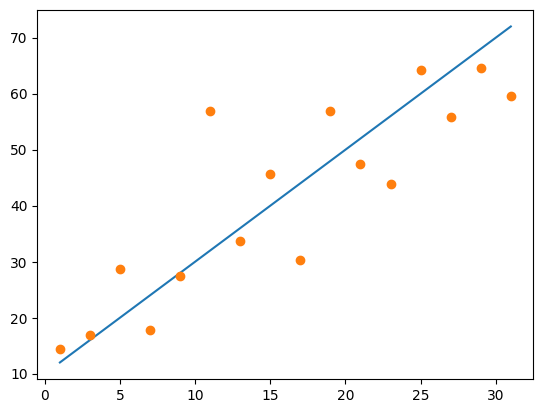

In [8]:
plt.plot(X1,h1)
plt.plot(X1,y1, 'o')
plt.show()

In [9]:
# Cria objeto
reg = LinearRegression()

In [10]:
# Ajusta os coeficientes
reg.fit(X1,y1)

LinearRegression()

In [11]:
b0_est = reg.intercept_[0]
b1_est = reg.coef_[0][0]

In [12]:
print('b0 original:', b0)
print('b0 Estimado:', b0_est)

print('b1 original:', b1)
print('b1 Estimado:', b1_est)

b0 original: 10
b0 Estimado: 16.383596793159587
b1 original: 2
b1 Estimado: 1.5705828629086034


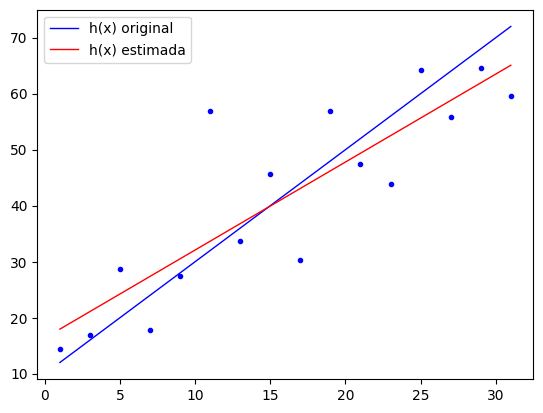

In [13]:
# plota valores y gerados artificialmente
plt.plot(X1, y1, 'b.')

# plota função hipótese criada originalmente
plt.plot(X1, h1, 'b', linewidth=1, label='h(x) original')

plt.plot(X1, reg.predict(X1), 'r', linewidth=1, label='h(x) estimada')

plt.legend()
plt.show()

## Gradient Descent

### Implementando o *Grandient Descent*

In [14]:
def cost_function(X, y, b0, b1):
    h_theta = b0 + b1*X
    N = len(X)

    # funcao custo
    # J(b0,b1) = 1/(2*N) * sum((y-y_pred)**2)
    J = 1/(2*N) * ((h_theta - y)**2).sum()

    return J

In [15]:
def update_params(theta0, theta1, X1, Y, alpha):
    # alpha: learning_rate

    n = len(X1)

    # Calculate partial derivatives
    theta0_deriv = np.sum(( (theta0 + theta1 * X1) - Y) * 1)     # X0 = 1
    theta1_deriv = np.sum(( (theta0 + theta1 * X1) - Y) * X1)

    # We subtract because the derivatives point
    # in direction of steepest ascent
    theta0 = theta0 - (alpha / n) * theta0_deriv
    theta1 = theta1 - (alpha / n) * theta1_deriv

    return theta0, theta1

In [16]:
def fit(theta0, theta1, X, y, learning_rate, n_iter):
    J = np.zeros(n_iter)

    for i in range(n_iter):
        theta0, theta1 = update_params(theta0, theta1, X, y, learning_rate)
        J[i] = cost_function(X, y, theta0, theta1)

        if i%20==0:  # imprime a cada 20 iteracoes
            print('%4d\ttheta0=%f\ttheta1=%f\tCost=%f' % (i,theta0,theta1,J[i]))

    return J


Parâmetros iniciais

In [38]:
# Chutes iniciais
theta0=1
theta1=1

# Taxa de aprendizado
#learning_rate = 200E-5   # <== TESTE VALORES MAIORES E VEJA O QUE ACONTECE
learning_rate =  1E-4  # <== TESTE VALORES MAIORES E VEJA O QUE ACONTECE


#número de iterações
n_iter = 600

J = fit(theta0, theta1, X1, y1, learning_rate, n_iter)

   0	theta0=1.002475	theta1=1.042885	Cost=322.656806
  20	theta0=1.040204	theta1=1.650144	Cost=133.471652
  40	theta0=1.063629	theta1=1.952858	Cost=86.361387
  60	theta0=1.079915	theta1=2.103650	Cost=74.606308
  80	theta0=1.092639	theta1=2.178656	Cost=71.649352
 100	theta0=1.103582	theta1=2.215857	Cost=70.881830
 120	theta0=1.113636	theta1=2.234199	Cost=70.659177
 140	theta0=1.123244	theta1=2.243133	Cost=70.572146
 160	theta0=1.132626	theta1=2.247374	Cost=70.518895
 180	theta0=1.141894	theta1=2.249274	Cost=70.474082
 200	theta0=1.151103	theta1=2.250007	Cost=70.431400
 220	theta0=1.160279	theta1=2.250157	Cost=70.389280
 240	theta0=1.169438	theta1=2.250017	Cost=70.347331
 260	theta0=1.178585	theta1=2.249732	Cost=70.305456
 280	theta0=1.187724	theta1=2.249375	Cost=70.263630
 300	theta0=1.196857	theta1=2.248982	Cost=70.221848
 320	theta0=1.205985	theta1=2.248572	Cost=70.180108
 340	theta0=1.215107	theta1=2.248152	Cost=70.138410
 360	theta0=1.224225	theta1=2.247729	Cost=70.096753
 380	theta

Para verificar se o algoritmo está convergindo, vamos plotar um gráfico da função custo.

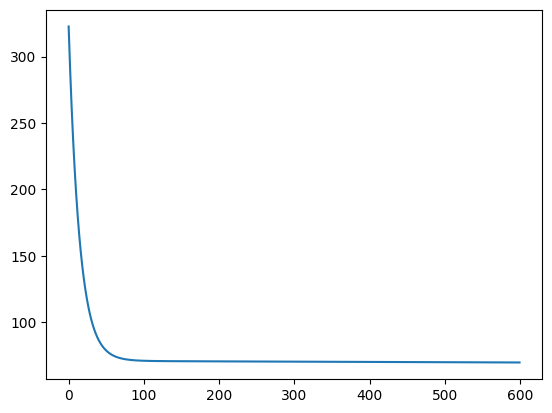

In [39]:
plt.plot(J)
plt.show()

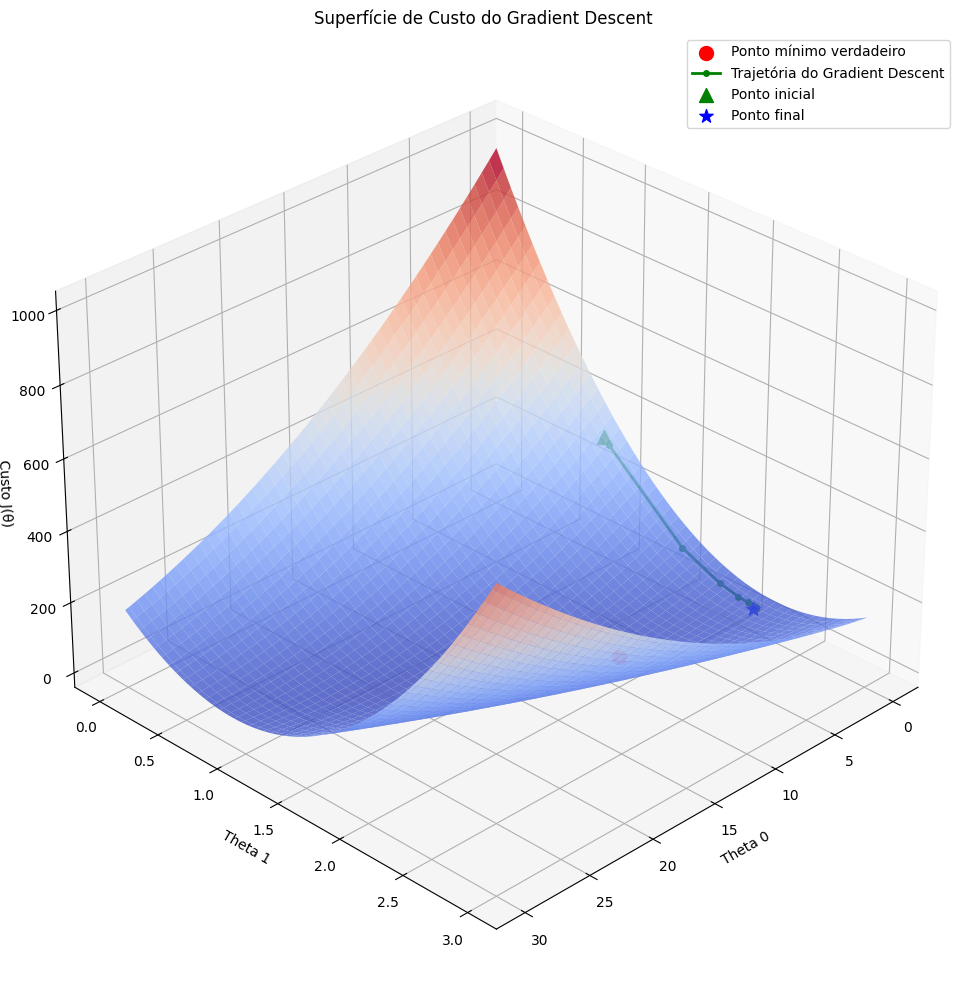

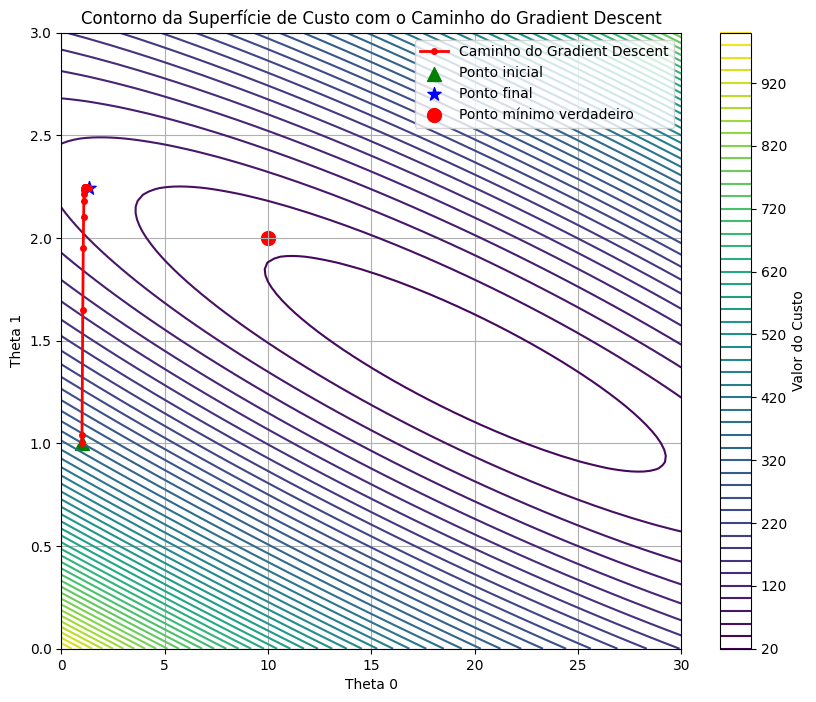

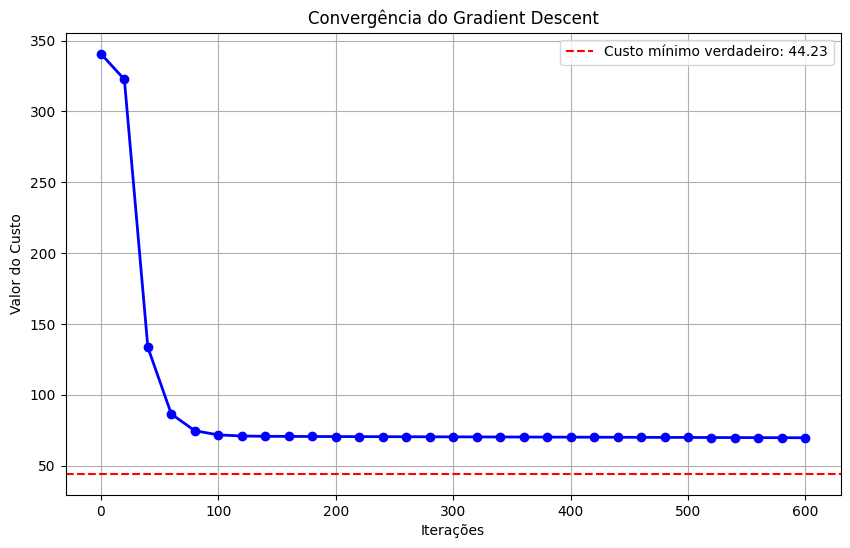

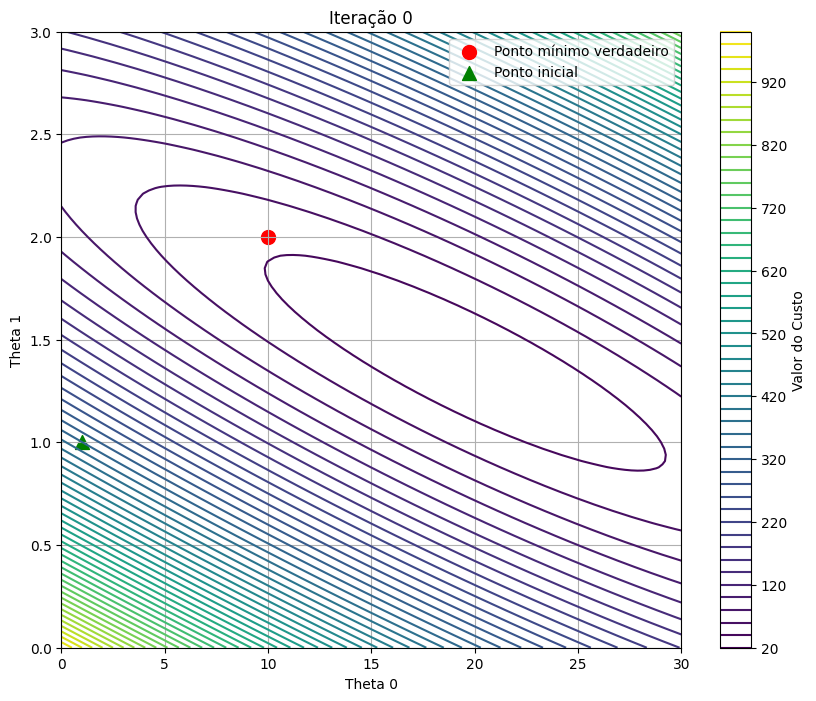

Valores verdadeiros: b0 = 10 b1 = 2
Valores encontrados: b0 = 1.3242205675351495 b1 = 2.243037836758899


In [33]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

#recriando os dados do notebook
X1 = np.arange(1, 32, 2).reshape(-1, 1)
np.random.seed(42)  # Para reproducibilidade
mu = 0.0
sigma = 10.0
err = np.random.normal(loc=mu, scale=sigma, size=X1.shape)
b0_true, b1_true = 10, 2
h1 = b0_true + b1_true * X1
y1 = h1 + err

#função de custo que vamos visualizar
def cost_function_viz(X, y, b0, b1):
    h_theta = b0 + b1 * X
    N = len(X)
    J = 1/(2*N) * np.sum((h_theta - y) ** 2)
    return J

theta0_vals = np.linspace(0, 30, 100)
theta1_vals = np.linspace(0, 3, 100)
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        J_vals[i, j] = cost_function_viz(X1, y1, theta0, theta1)

theta0_mesh, theta1_mesh = np.meshgrid(theta0_vals, theta1_vals)

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(theta0_mesh, theta1_mesh, J_vals.T, cmap=cm.coolwarm, alpha=0.8)

ax.set_xlabel('Theta 0')
ax.set_ylabel('Theta 1')
ax.set_zlabel('Custo J(θ)')
ax.set_title('Superfície de Custo do Gradient Descent')

min_theta0, min_theta1 = b0_true, b1_true
min_cost = cost_function_viz(X1, y1, min_theta0, min_theta1)
ax.scatter([min_theta0], [min_theta1], [min_cost], color='red', marker='o', s=100, label='Ponto mínimo verdadeiro')

theta0_start, theta1_start = 1, 1  # Ponto inicial
learning_rate = 10E-5
iterations = 600
theta0_path = [theta0_start]
theta1_path = [theta1_start]
J_path = [cost_function_viz(X1, y1, theta0_start, theta1_start)]

def update_params_viz(theta0, theta1, X, Y, alpha):
    n = len(X)
    theta0_deriv = np.sum(((theta0 + theta1 * X) - Y) * 1)
    theta1_deriv = np.sum(((theta0 + theta1 * X) - Y) * X)
    theta0 = theta0 - (alpha / n) * theta0_deriv
    theta1 = theta1 - (alpha / n) * theta1_deriv
    return theta0, theta1

current_theta0, current_theta1 = theta0_start, theta1_start
for i in range(iterations):
    current_theta0, current_theta1 = update_params_viz(current_theta0, current_theta1, X1, y1, learning_rate)
    if i % 20 == 0:
        theta0_path.append(current_theta0)
        theta1_path.append(current_theta1)
        J_path.append(cost_function_viz(X1, y1, current_theta0, current_theta1))

ax.plot(theta0_path, theta1_path, J_path, 'g-o', linewidth=2, markersize=4, label='Trajetória do Gradient Descent')
ax.scatter([theta0_path[0]], [theta1_path[0]], [J_path[0]], color='green', marker='^', s=100, label='Ponto inicial')
ax.scatter([theta0_path[-1]], [theta1_path[-1]], [J_path[-1]], color='blue', marker='*', s=100, label='Ponto final')

ax.legend()

ax.view_init(30, 45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
contour = plt.contour(theta0_mesh, theta1_mesh, J_vals.T, 50, cmap='viridis')
plt.colorbar(contour, label='Valor do Custo')

plt.plot(theta0_path, theta1_path, 'r-o', linewidth=2, markersize=4, label='Caminho do Gradient Descent')
plt.scatter([theta0_path[0]], [theta1_path[0]], color='green', marker='^', s=100, label='Ponto inicial')
plt.scatter([theta0_path[-1]], [theta1_path[-1]], color='blue', marker='*', s=100, label='Ponto final')
plt.scatter([min_theta0], [min_theta1], color='red', marker='o', s=100, label='Ponto mínimo verdadeiro')

plt.xlabel('Theta 0')
plt.ylabel('Theta 1')
plt.title('Contorno da Superfície de Custo com o Caminho do Gradient Descent')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(range(0, iterations+1, 20), J_path, 'b-o', linewidth=2)
plt.axhline(y=min_cost, color='r', linestyle='--', label=f'Custo mínimo verdadeiro: {min_cost:.2f}')
plt.xlabel('Iterações')
plt.ylabel('Valor do Custo')
plt.title('Convergência do Gradient Descent')
plt.legend()
plt.grid(True)
plt.show()

from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots(figsize=(10, 8))
contour = ax.contour(theta0_mesh, theta1_mesh, J_vals.T, 50, cmap='viridis')
plt.colorbar(contour, label='Valor do Custo')

ax.scatter([min_theta0], [min_theta1], color='red', marker='o', s=100, label='Ponto mínimo verdadeiro')
ax.scatter([theta0_path[0]], [theta1_path[0]], color='green', marker='^', s=100, label='Ponto inicial')

line, = ax.plot([], [], 'r-o', linewidth=2, markersize=6)
point, = ax.plot([], [], 'bo', markersize=10)
title = ax.set_title('Iteração 0')

def init():
    line.set_data([], [])
    point.set_data([], [])
    return line, point, title

def update(frame):
    line.set_data(theta0_path[:frame+1], theta1_path[:frame+1])
    point.set_data([theta0_path[frame]], [theta1_path[frame]])
    title.set_text(f'Iteração {frame*20}')
    return line, point, title


ani = FuncAnimation(fig, update, frames=len(theta0_path), init_func=init, blit=True, interval=200)

ax.set_xlabel('Theta 0')
ax.set_ylabel('Theta 1')
ax.legend()
ax.grid(True)



plt.show()

print("Valores verdadeiros: b0 =", b0_true, "b1 =", b1_true)
print("Valores encontrados: b0 =", theta0_path[-1], "b1 =", theta1_path[-1])

### Exercícios:

1) Explique porque neste exemplo a função custo não alcança o valor zero. Existe algum caso em que alcançaria zero?

por que tem ruido nos dados o que impede de chegar no ponto otimo

2) Altere o valor da taxa de aprendizado ligeiramente para menos e informe o que acontece. Teste para 1E-4 (), 1E-6.

Obs: em Python, a notação numérica 1E-4 representa $10^{-4}$.

Resposta: no primeiro caso o algoritmo converge de forma mais rapida o que melhora o desempenho do modelo e sua eficacia, ja no segundo ele demora bem mais a convergir, apenas chegando realmente proximo de convergir quando tiver 600 iterações

3) Agora aumente pouco a pouco a taxa de aprendizado (ex: acréscimos de +0.005) e descubra a partir de que valor o algoritmo diverge.



Resposta:
2E-2


**4) Caso a base de dados tenha mais de uma coluna (X = [1, X1, X2, X3, X4, ...]), descreva quais mudanças deveriam ser realizadas na função `update_params`.**

In [ ]:
def update_params(Theta, X, Y, alpha):
    n = len(X)

    #theta agora é um vetor de parâmetros [θ0, θ1, θ2, θ3, ...]
    #x é uma matriz com uma linha para cada amostra e uma coluna para cada característica
    #a primeira coluna de X deve ser toda de 1's para o termo de interceptação (θ0)

    #calcula as previsões do modelo
    h_theta = np.dot(X, Theta)  # Multiplicação matricial

    #calcula o erro
    errors = h_theta - Y

    #calcula as derivadas para todos os parâmetros de uma vez
    gradients = np.dot(X.T, errors) / n  # X.T é a transposta de X

    #atualiza todos os parâmetros simultaneamente
    Theta = Theta - alpha * gradients

    return Theta